#Paso 1

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

[https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html)

El nombre del DataFrame debe ser weather_records y tienes que especificarlo cuando buscas: attrs={"id": "weather_records"} . Imprime el DataFrame completo.

In [2]:
import requests #libreria para enviar solicitudes al servidor
from bs4 import BeautifulSoup #libreria para analizar la pagina web
import pandas as pd

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)


In [3]:
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table', attrs={'id':'weather_records'})

In [4]:
data = []
for tr in table.find_all('tr'): #iteramos sobre <tr> (las filas de la tabla)
  row = [td.text for td in tr.find_all('td')] #iteramos sobre <td> (los elementos de la fila)
  data.append(row)

#eliminamos la primera entrada que no tiene la data que buscamos
data.pop(0)

#cramos el dataframe
weather_records = pd.DataFrame(data, columns=['ts', 'temp', 'description'])

print(weather_records.head(5))

                    ts     temp       description
0  2017-11-01 00:00:00  276.150     broken clouds
1  2017-11-01 01:00:00  275.700  scattered clouds
2  2017-11-01 02:00:00  275.610   overcast clouds
3  2017-11-01 03:00:00  275.350     broken clouds
4  2017-11-01 04:00:00  275.240     broken clouds


# Paso 4. Analisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

- company_name: nombre de la empresa de taxis

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [5]:
#Carga de librerias
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [6]:
#Cargar datos
df_trips_per_company = pd.read_csv('/content/sample_data/moved_project_sql_result_01.csv')
df_trips_info = pd.read_csv('/content/sample_data/moved_project_sql_result_04.csv')

## Inspeccion de df_trips_per_company


In [7]:
df_trips_per_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
print(df_trips_per_company['company_name'].duplicated().sum())

0


Para el dataframe 'df_trips_per_company', se confirma que el tipo de datos corresponde para cada columna y este conjunto de datos no contiene filas duplicadas o con datos ausentes.

## Inspeccion df_trips_info

In [9]:
df_trips_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
print(df_trips_info.duplicated().sum())

0


El dataframe 'df_trips_info' tampoco cuenta con filas duplicadas o filas  con valores ausentes.

## Barrios mas populares para finalizacion de viaje

In [11]:
top_10_neighborhoods = df_trips_info.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


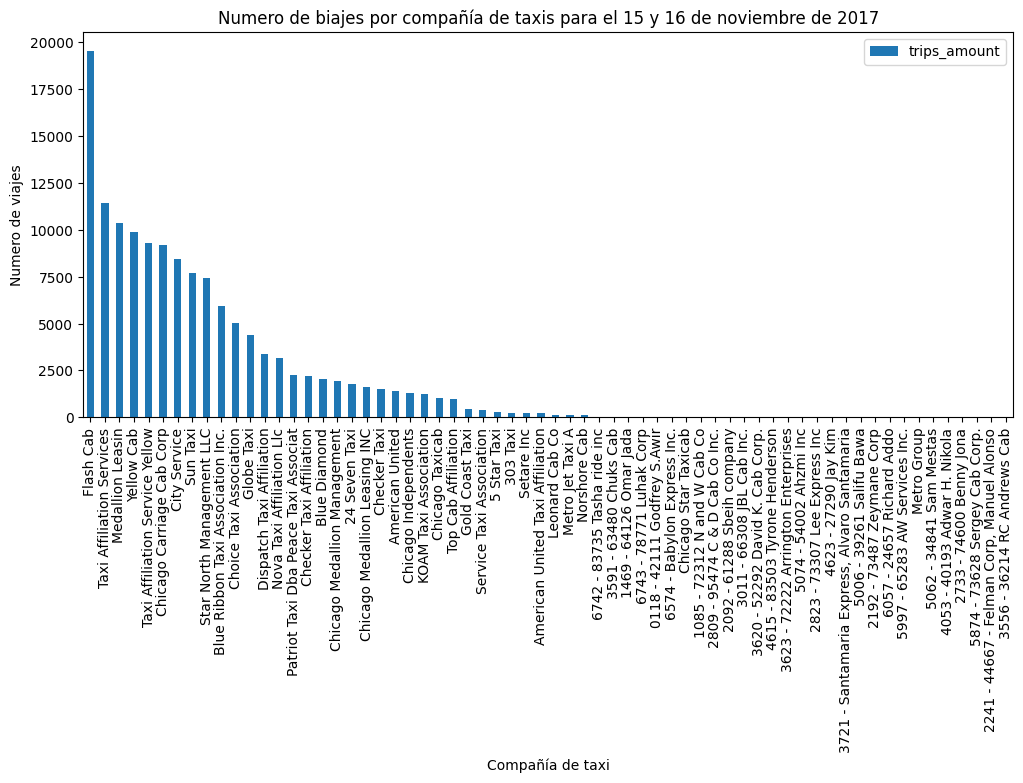

In [12]:

df_trips_per_company.sort_values(by='trips_amount', ascending=False).plot(x='company_name', y='trips_amount', kind='bar', figsize=(12, 5))
plt.ylabel('Numero de viajes')
plt.xlabel('Compañía de taxi')
plt.title('Numero de viajes por compañía de taxis para el 15 y 16 de noviembre de 2017')
plt.show()

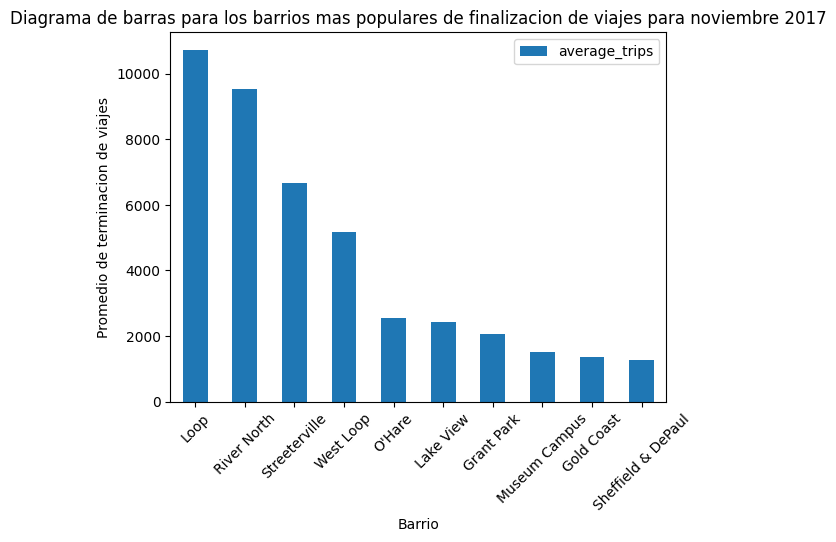

In [13]:
top_10_neighborhoods.plot(x='dropoff_location_name', y='average_trips', kind='bar', rot = 45)
plt.xlabel('Barrio')
plt.ylabel('Promedio de terminacion de viajes')
plt.title('Diagrama de barras para los barrios mas populares de finalizacion de viajes para noviembre 2017')
plt.show()

# Paso 5. Prueba de hipotesis (Python)

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

In [14]:
trips_loop_to_ohare = pd.read_csv('/content/sample_data/moved_project_sql_result_07.csv')

In [15]:
trips_loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
trips_loop_to_ohare['start_ts'] = pd.to_datetime(trips_loop_to_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')

trips_loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [32]:
print(trips_loop_to_ohare['weather_conditions'].unique())
print(trips_loop_to_ohare.duplicated().sum())

['Good' 'Bad']
197


Encontramos algunas filas duplicadas en el conjunto de datos. Asumimos que esto fue posible al considerar que se pudo haber tomado el mismo viaje dentro del tiempo de redondeo de la hora para la columna 'start_ts' y la duración del viaje ('duration_seconds') no cambió significativamente.

In [20]:
trips_loop_to_ohare['day_of_week'] = trips_loop_to_ohare['start_ts'].dt.weekday
print(trips_loop_to_ohare.head(5))

             start_ts weather_conditions  duration_seconds  day_of_week
0 2017-11-25 16:00:00               Good            2410.0            5
1 2017-11-25 14:00:00               Good            1920.0            5
2 2017-11-25 12:00:00               Good            1543.0            5
3 2017-11-04 10:00:00               Good            2512.0            5
4 2017-11-11 07:00:00               Good            1440.0            5


In [45]:
good_weather_sats = trips_loop_to_ohare[(trips_loop_to_ohare['day_of_week'] == 5) & (trips_loop_to_ohare['weather_conditions'] == 'Good')]
bad_weather_sats =trips_loop_to_ohare[(trips_loop_to_ohare['day_of_week'] == 5) & (trips_loop_to_ohare['weather_conditions'] != 'Good')]

print('Duracion promedio en segundos de viajes en sabado con buenas condiciones climaticas:', good_weather_sats['duration_seconds'].mean())
print('Duracion promedio en segundos de viajes en sabado con malas condiciones climaticas:', bad_weather_sats['duration_seconds'].mean())


Duracion promedio en segundos de viajes en sabado con buenas condiciones climaticas: 1999.6756756756756
Duracion promedio en segundos de viajes en sabado con malas condiciones climaticas: 2427.2055555555557


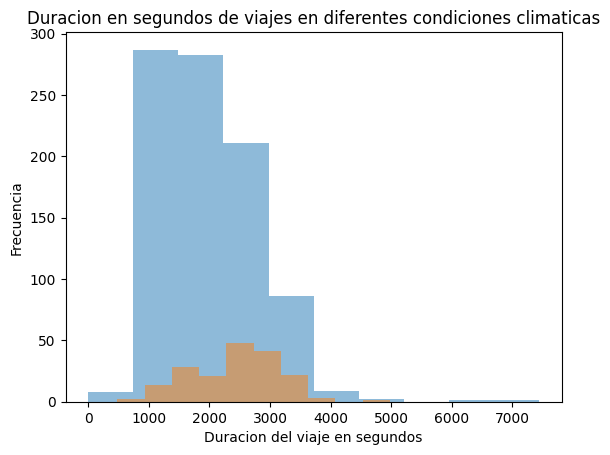

In [42]:
good_weather_sats['duration_seconds'].plot(kind='hist', alpha=0.5)
bad_weather_sats['duration_seconds'].plot(kind='hist', alpha=0.5)

plt.title('Duracion en segundos de viajes en diferentes condiciones climaticas')
plt.xlabel('Duracion del viaje en segundos')
plt.ylabel('Frecuencia')
plt.show()

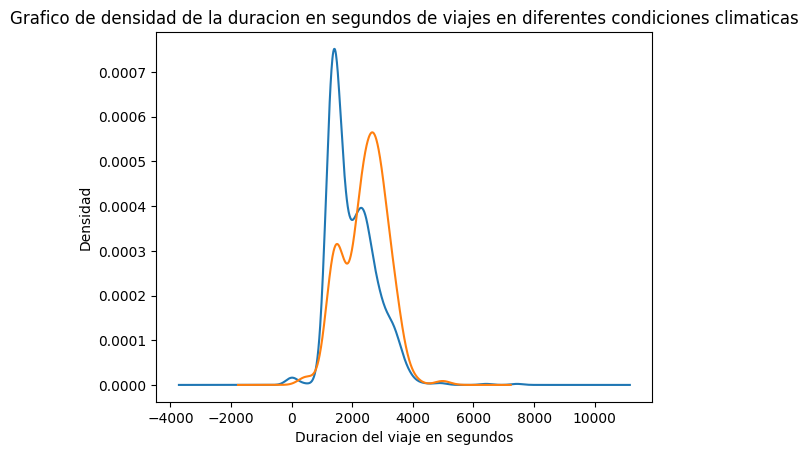

In [43]:
good_weather_sats['duration_seconds'].plot(kind='density')
bad_weather_sats['duration_seconds'].plot(kind='density')

plt.title('Grafico de densidad de la duracion en segundos de viajes en diferentes condiciones climaticas')
plt.xlabel('Duracion del viaje en segundos')
plt.ylabel('Densidad')
plt.show()

Haremos la prueba de hipotesis sobre si la duracion promedio de los viajes desde el Loop hasta el Aeropuerto cambia en dias lluviosos, esto significa que estamos comparando la igualdad de dos poblaciones.

Nuestra hipotesis nula H_0, asume que ambas poblaciones son iguales, inversamente la hipotesis alterna, H_1, asume que son distintas.

In [47]:
sample_1 = good_weather_sats['duration_seconds']
sample_2 = bad_weather_sats['duration_seconds']

alpha = 0.5 #nivel de significancia estadistica critica

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
  print('Rechazamos la hipotesis nula')
else:
  print('No podemos rechazar la hipotesis nula')

Valor p: 6.738994326108734e-12
Rechazamos la hipotesis nula
